In [1]:
version = 'ver4'

In [1]:
import docx 
import json
from rouge import Rouge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import bert_score
import pandas as pd
from gensim.models import Word2Vec
from prompt_template import evaulate_keyword_prompt1, validate_response_prompt, generate_response
from library.exportation import export_evaluation_result
import openpyxl
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm 
import pandas as pd
import matplotlib.pyplot as plt
key = "sk-NAWSSGI7999d18B51046T3BlBkFJ514d034054e342cc99c3"

c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

def compute_rouge(generated, ground_truth):
    rouge = Rouge()
    scores = rouge.get_scores(generated, ground_truth, avg=True)
    return scores

def compute_cosine_similarity(doc1, doc2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([doc1, doc2])
    return cosine_similarity(vectors[0:1], vectors[1:2])[0][0]

def compute_bleu(generated, ground_truth):
    reference = [ground_truth.split()]
    candidate = generated.split()
    smoothie = SmoothingFunction().method4
    score = sentence_bleu(reference, candidate, smoothing_function=smoothie)
    return score

def compute_bertscore(generated, ground_truth):
    P, R, F1 = bert_score.score([generated], [ground_truth], lang="en", verbose=True)
    return F1.mean().item()

def cust_cosine_similarity(expected_value, response):
    tokens1 = expected_value.lower().split()
    tokens2 = response.lower().split()

    # Create a Word2Vec model (for demonstration only; normally you'd load a pre-trained model)
    model = Word2Vec([tokens1, tokens2], min_count=1)

    # Get average vector for each sentence
    def average_vector(tokens):
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0)

    vec1 = average_vector(tokens1)
    vec2 = average_vector(tokens2)

    # Calculate cosine similarity
    similarity = cosine_similarity([vec1], [vec2])
    return similarity[0][0]

# response and expected value evaluation

In [14]:
codes = ['1', '778', '916', '3306', '6055']

for code in tqdm(codes):
    for vers in ['ver2', 'ver3']:
        company_expected = pd.read_excel('expected_value.xlsx', sheet_name=code)
        expected_value = company_expected[vers].dropna()
        
        company_response = pd.read_excel('response.xlsx', sheet_name=code)
        response = company_response[vers].dropna()


        cosine_result = []
        bert_result = []
        for i, j in zip(expected_value, response):
            cosinescore = cust_cosine_similarity(i, j)
            bertscore = compute_bertscore(i, j)

            cosine_result.append(cosinescore)
            bert_result.append(bertscore)

        cosine_result = pd.DataFrame(cosine_result, columns=[vers])
        bert_result = pd.DataFrame(bert_result, columns=[vers])

        cosine_scoring = pd.read_excel('evaluation_response_score_cosine.xlsx', sheet_name=code)
        cosine_target = pd.concat([cosine_scoring, cosine_result], axis=1)
        
        bert_scoring = pd.read_excel('evaluation_response_score_bert.xlsx', sheet_name=code)
        bert_target = pd.concat([bert_scoring, bert_result], axis=1)

        with pd.ExcelWriter('evaluation_response_score_cosine.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
            cosine_target.to_excel(writer, sheet_name=code, index=False)

        with pd.ExcelWriter('evaluation_response_score_bert.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
            bert_target.to_excel(writer, sheet_name=code, index=False)

  0%|          | 0/5 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.62s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 25.89it/s]


done in 3.67 seconds, 0.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.73s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


done in 5.93 seconds, 0.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.91s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.92 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.02 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.46 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1034.86it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.82it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.91it/s]


done in 1.94 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 332.83it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 490.05it/s]


done in 4.25 seconds, 0.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.81it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.60 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 68.49it/s]


done in 1.69 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 286.07it/s]


done in 2.15 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 581.25it/s]


done in 1.98 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.94it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 64.00it/s]


done in 1.78 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 42.03it/s]


done in 2.62 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.47 seconds, 0.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.48 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.68 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.04it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 412.95it/s]


done in 2.40 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.11 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 235.78it/s]


done in 2.48 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.42 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 287.85it/s]


done in 1.86 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 223.85it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 117.72it/s]


done in 1.94 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.82 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.16it/s]


done in 1.94 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.32 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


done in 2.50 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 75.87it/s]


done in 3.91 seconds, 0.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.73 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.53 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.75 seconds, 0.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.05it/s]


done in 3.48 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.53 seconds, 0.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.12it/s]


done in 2.27 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 492.23it/s]


done in 2.47 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.31it/s]


done in 2.33 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


done in 6.02 seconds, 0.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.24 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.36 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 149.69it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.80 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.84it/s]


done in 2.29 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.70it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 242.80it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 476.84it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.71 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 687.03it/s]


done in 1.80 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.68it/s]


done in 1.67 seconds, 0.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.88 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.45it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.77 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 301.23it/s]


done in 1.67 seconds, 0.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.83 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.27it/s]


done in 2.18 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.84it/s]


done in 1.71 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 276.96it/s]


done in 1.70 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.45it/s]


done in 1.79 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 641.92it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.74it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.38it/s]


done in 2.61 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.50it/s]


done in 2.05 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.74 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.20 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.32 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


done in 2.81 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 244.94it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.85 seconds, 0.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.97it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.59 seconds, 0.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 273.85it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 64.14it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 18.81it/s]


done in 3.09 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.74it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 301.38it/s]


done in 1.67 seconds, 0.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 375.87it/s]


done in 2.58 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 204.73it/s]


done in 2.04 seconds, 0.49 sentences/sec


 20%|██        | 1/5 [05:34<22:16, 334.23s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 166.35it/s]


done in 3.10 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


done in 2.76 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 173.85it/s]


done in 4.86 seconds, 0.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 28.34it/s]


done in 5.49 seconds, 0.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.09it/s]


done in 3.58 seconds, 0.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.35 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 198.65it/s]


done in 2.06 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.77 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 372.00it/s]


done in 2.17 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.86 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.26it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.07it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.68it/s]


done in 1.40 seconds, 0.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 330.18it/s]


done in 1.98 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.99 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.84it/s]


done in 1.86 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.99it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 496.19it/s]


done in 2.71 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.96 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.89it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.48 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.79it/s]


done in 2.68 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.27it/s]


done in 2.64 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


done in 2.96 seconds, 0.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.93it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.77 seconds, 0.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.06it/s]


done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 64.00it/s]


done in 2.49 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 57.89it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.99 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


done in 2.49 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 199.93it/s]


done in 4.01 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.80 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 180.14it/s]


done in 2.54 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.33it/s]


done in 2.65 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 39.99it/s]


done in 1.51 seconds, 0.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.38it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 335.76it/s]


done in 1.91 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.66 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.69 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.93it/s]


done in 2.33 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.81it/s]


done in 2.91 seconds, 0.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 241.77it/s]


done in 2.89 seconds, 0.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.51it/s]


done in 3.55 seconds, 0.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 13.24it/s]


done in 4.91 seconds, 0.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:08<00:00,  8.87s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 150.30it/s]


done in 8.90 seconds, 0.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.80 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.00s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 4.02 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.27it/s]


done in 4.29 seconds, 0.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.88it/s]


done in 3.97 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 321.72it/s]


done in 2.35 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 247.31it/s]


done in 2.27 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 329.20it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.92 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.63it/s]


done in 2.34 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.88it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.42it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.34 seconds, 0.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.73 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.97 seconds, 0.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  9.21it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 43.08it/s]


done in 3.80 seconds, 0.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.39it/s]


done in 2.50 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 13.96it/s]


done in 2.76 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.08 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.78 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 262.67it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.55it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.78 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 483.60it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.60it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.63it/s]


done in 1.51 seconds, 0.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.15it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 211.42it/s]


done in 2.15 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.88it/s]


done in 2.49 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 332.93it/s]


done in 2.62 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 208.55it/s]


done in 2.40 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.45it/s]


done in 2.36 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 440.76it/s]


done in 1.98 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 59.50it/s]


done in 1.80 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.84it/s]


done in 1.50 seconds, 0.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 334.26it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.38it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.20it/s]


done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 549.42it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 68.52it/s]


done in 2.36 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.32it/s]


done in 3.29 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 320.76it/s]


done in 2.28 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 229.64it/s]


done in 2.05 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.08 seconds, 0.48 sentences/sec


 40%|████      | 2/5 [11:35<17:29, 349.86s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.61 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.44 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 164.45it/s]


done in 3.71 seconds, 0.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:04<00:00,  4.86s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]


done in 4.95 seconds, 0.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:07<00:00,  7.29s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 7.30 seconds, 0.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 12.17it/s]


done in 2.40 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.44 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.28it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.41 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 464.90it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.03it/s]


done in 2.35 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 78.37it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.48 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 338.11it/s]


done in 2.29 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.23 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.50it/s]


done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.20 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.94 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


done in 3.32 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.46 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 498.97it/s]


done in 2.71 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.99 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.79 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.17it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 279.43it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.12 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.42 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 490.56it/s]


done in 1.55 seconds, 0.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.33it/s]


done in 1.98 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 332.93it/s]


done in 2.83 seconds, 0.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 19.87it/s]


done in 3.59 seconds, 0.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 998.64it/s]


done in 1.87 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.93it/s]


done in 2.73 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.34 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.27 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.45 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.15 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.25it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.77 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.94 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.69 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 121.73it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.26it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.20 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.32it/s]


done in 3.48 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.40it/s]


done in 3.37 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.33 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.89 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.07it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.98 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.82 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.82 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.59 seconds, 0.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.70 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.36 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.17 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.45 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.11 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.66 seconds, 0.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 490.28it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.46 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.19it/s]


done in 2.28 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.86it/s]


done in 1.91 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.96 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


done in 1.77 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.75 seconds, 0.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.17 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.40 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.32 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.02 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.19it/s]


done in 1.57 seconds, 0.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.39 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.93it/s]


done in 1.88 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.62it/s]


done in 2.26 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.91it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.75 seconds, 0.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.09it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.84it/s]


done in 2.56 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.91 seconds, 0.52 sentences/sec


 60%|██████    | 3/5 [17:08<11:25, 342.60s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.53 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.13it/s]


done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.12it/s]


done in 3.19 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 5.33 seconds, 0.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:06<00:00,  6.59s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.09it/s]


done in 6.62 seconds, 0.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.48it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.03 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.94 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.02 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.80 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.59 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.55 seconds, 0.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.98 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.60 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.52it/s]


done in 2.17 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.71 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.28it/s]


done in 1.64 seconds, 0.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.80 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.18 seconds, 0.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.03 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.83 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.38it/s]


done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.16it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.50 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.46it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.45 seconds, 0.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.91 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.88 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.91it/s]


done in 2.26 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.25 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.49it/s]


done in 2.03 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.37it/s]


done in 1.53 seconds, 0.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.49 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.05 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.33 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.54it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.10it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.34 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.88it/s]


done in 3.02 seconds, 0.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.45 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.94s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.13it/s]


done in 3.96 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 11.00it/s]


done in 5.22 seconds, 0.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.45 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.17it/s]


done in 1.78 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.21it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.12 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.06 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.98 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.55 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.33it/s]


done in 2.36 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 121.50it/s]


done in 1.78 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.62 seconds, 0.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.21 seconds, 0.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.12it/s]


done in 1.79 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.98it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.39it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.19 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.60 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.73 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.88it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.12 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.66 seconds, 0.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.89 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.89 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.80 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.26it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.28 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.87 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.69 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 165.84it/s]


done in 2.59 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.82it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.81 seconds, 0.55 sentences/sec


 80%|████████  | 4/5 [22:31<05:34, 334.54s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 98.89it/s]


done in 2.02 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 97.49it/s]


done in 3.56 seconds, 0.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


done in 3.77 seconds, 0.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


done in 6.25 seconds, 0.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.01it/s]


done in 5.32 seconds, 0.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 185.55it/s]


done in 2.60 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 166.61it/s]


done in 3.45 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.15it/s]


done in 5.08 seconds, 0.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 3.45 seconds, 0.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.85 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.40 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.63it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.56it/s]


done in 2.32 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.99 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 351.64it/s]


done in 2.43 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.16 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.02 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 489.70it/s]


done in 2.14 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 64.03it/s]


done in 2.17 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 491.14it/s]


done in 2.04 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.90 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.04it/s]


done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 12.74it/s]


done in 2.46 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.97it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 442.76it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 498.91it/s]


done in 2.12 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]


done in 2.37 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.88 seconds, 0.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


done in 1.79 seconds, 0.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.27 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 328.73it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.45 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


done in 2.20 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.51it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 11.73it/s]


done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 498.49it/s]


done in 2.00 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 342.81it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.99 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 11.42it/s]


done in 1.92 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 307.48it/s]


done in 2.15 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.46it/s]


done in 2.39 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.41 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.35 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.47it/s]


done in 2.59 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


done in 3.93 seconds, 0.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 5.31 seconds, 0.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:05<00:00,  5.58s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 215.41it/s]


done in 5.60 seconds, 0.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.32it/s]


done in 1.68 seconds, 0.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 500.27it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 974.51it/s]


done in 2.30 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 377.90it/s]


done in 2.19 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.72 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 344.28it/s]


done in 2.42 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.65it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 86.86it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 496.48it/s]


done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 357.63it/s]


done in 2.35 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.46it/s]


done in 2.01 seconds, 0.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.28it/s]


done in 1.81 seconds, 0.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 250.21it/s]


done in 2.43 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.62 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 141.93it/s]


done in 2.20 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.74 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.56it/s]


done in 2.38 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 320.30it/s]


done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 332.78it/s]


done in 2.59 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 497.78it/s]


done in 2.49 seconds, 0.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.84 seconds, 0.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.94 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 99.88it/s]


done in 2.86 seconds, 0.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.26it/s]


done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 13.59it/s]


done in 2.23 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 1.73 seconds, 0.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 76.68it/s]


done in 3.12 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 57.07it/s]


done in 2.31 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.77s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 247.48it/s]


done in 3.79 seconds, 0.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 208.68it/s]


done in 2.03 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.25it/s]


done in 2.27 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


done in 3.24 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 249.91it/s]


done in 2.97 seconds, 0.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.86it/s]


done in 2.81 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.62it/s]


done in 2.42 seconds, 0.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.36 seconds, 0.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 284.80it/s]


done in 3.04 seconds, 0.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 103.16it/s]


done in 3.26 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 2.33 seconds, 0.43 sentences/sec


100%|██████████| 5/5 [28:25<00:00, 341.16s/it]


In [ ]:
cosine_summary = pd.DataFrame(columns=['ver2', 'ver3'])
bert_summary = pd.DataFrame(columns=['ver2', 'ver3'])


codes = ['1', '778', '916', '3306', '6055']
for c in codes:
    c_score = pd.read_excel('evaluation_response_score_cosine.xlsx', sheet_name=c)
    c_result = c_score.mean()
    cosine_summary.loc[c] = c_result

    b_score = pd.read_excel('evaluation_response_score_bert.xlsx', sheet_name=c)
    b_result = b_score.mean()
    bert_summary.loc[c] = b_result


cosine_summary.index.name = 'code'
bert_summary.index.name = 'code'

cosine_summary.to_excel('cosine_score_summary.xlsx')
bert_summary.to_excel('bert_score_summary.xlsx')

# score for report

In [ ]:
cosine_summary = pd.DataFrame(columns=['ver1', 'ver2', 'ver3'])
bert_summary = pd.DataFrame(columns=['ver1', 'ver2', 'ver3'])


codes = ['1', '778', '916', '3306', '6055']
for c in codes:

    c_score = pd.read_excel('evaluation_response_score_cosine.xlsx', sheet_name=c)
    c_result = c_score.mean()
    cosine_summary.loc[c] = c_result

    b_score = pd.read_excel('evaluation_response_score_bert.xlsx', sheet_name=c)
    b_result = b_score.mean()
    bert_summary.loc[c] = b_result


cosine_summary.index.name = 'code'
bert_summary.index.name = 'code'

# calculate the score for report with expected value

In [51]:
codes = ['1', '778', '916', '3306', '6055']
ground_truth_list = ['1.HK.docx', '778.HK.docx', '916.HK.docx', '3306.HK.docx', '6055.HK.docx']

cosine_summary_report = pd.DataFrame(columns=['ver1', 'ver2', 'ver3'])
bert_summary_report = pd.DataFrame(columns=['ver1', 'ver2', 'ver3'])

result_score = []
for ground_truth, c in zip(ground_truth_list, codes):
    for v in ['ver1', 'ver2', 'ver3']:

        ground_truth_path = rf'4_ground_truth\{ground_truth}'
        ground_truth_report = extract_text_from_docx(ground_truth_path)

        gen_report = pd.read_excel('reports.xlsx', sheet_name=c)[v].to_string()

        cosinescore = cust_cosine_similarity(gen_report, ground_truth_report)
        cosine_summary_report.loc[c, v] = cosinescore

        bertscore = compute_bertscore(gen_report, ground_truth_report)
        bert_summary_report.loc[c, v] = bertscore


cosine_summary_report.index.name = 'code'
bert_summary_report.index.name = 'code'

cosine_summary_report.to_excel('cosine_score_report.xlsx')
bert_summary_report.to_excel('bert_score_report.xlsx')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:20<00:00, 20.22s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 19.58it/s]


done in 20.30 seconds, 0.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:11<00:00, 11.78s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.40it/s]


done in 11.78 seconds, 0.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:13<00:00, 13.52s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 13.52 seconds, 0.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:10<00:00, 10.89s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 10.90 seconds, 0.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:13<00:00, 13.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 13.10 seconds, 0.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:11<00:00, 11.48s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 124.34it/s]


done in 11.49 seconds, 0.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:11<00:00, 11.37s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 123.78it/s]


done in 11.38 seconds, 0.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:15<00:00, 15.91s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


done in 15.98 seconds, 0.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:13<00:00, 13.44s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 16.56it/s]


done in 13.50 seconds, 0.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:14<00:00, 14.09s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 14.15 seconds, 0.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:12<00:00, 12.82s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1359.58it/s]


done in 12.82 seconds, 0.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:10<00:00, 10.19s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 10.20 seconds, 0.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:10<00:00, 10.21s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 60.49it/s]


done in 10.22 seconds, 0.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:11<00:00, 11.01s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 11.02 seconds, 0.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:11<00:00, 11.24s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 11.25 seconds, 0.09 sentences/sec


In [16]:
def validation_prompt(expected_value, content):
    system_prompt = f"""You are a checker. 
    You are provided a list of key messages delimited by triple backticks and report delimited by triple Angle brackets.
    Task to do as follow:
    1. Understand each key message.
    2. Check whether each key message or a similar message is present in the report.
    3. Pay attention: as long as the report deliver the similar message, it counts as a match. Exact wording is not neccssary.
    4. If report contains the key message, tag 1, else tag 0.

    Output as a json file without any formatting.
    key is the key, tagging is the value.
    Output sample:
    {{key message: 0, key message: 1, ...}} 

    key message:
    ```{expected_value}```
    
    report:    
    <<<{content}>>>
    """
    return system_prompt

In [24]:
_1_expected_value = pd.read_excel('expected_value.xlsx', sheet_name='1')
_778_expected_value = pd.read_excel('expected_value.xlsx', sheet_name='778')
_916_expected_value = pd.read_excel('expected_value.xlsx', sheet_name='916')
_3306_expected_value = pd.read_excel('expected_value.xlsx', sheet_name='3306')
_6055_expected_value = pd.read_excel('expected_value.xlsx', sheet_name='6055')

_1_report = pd.read_excel('reports.xlsx', sheet_name='1')
_778_report = pd.read_excel('reports.xlsx', sheet_name='778')
_916_report = pd.read_excel('reports.xlsx', sheet_name='916')
_3306_report = pd.read_excel('reports.xlsx', sheet_name='3306')
_6055_report = pd.read_excel('reports.xlsx', sheet_name='6055')

_1_key_msg = _1_expected_value.iloc[:, -1].to_list()
_778_key_msg = _778_expected_value.iloc[:, -1].to_list()
_916_key_msg = _916_expected_value.iloc[:, -1].to_list()
_3306_key_msg = _3306_expected_value.iloc[:, -1].to_list()
_6055_key_msg = _6055_expected_value.iloc[:, -1].to_list()

_1_report = str(_1_report.loc[:, 'ver1'].values)
_778_report = str(_778_report.loc[:, 'ver1'].values)
_916_report = str(_916_report.loc[:, 'ver1'].values)
_3306_report = str(_3306_report.loc[:, 'ver1'].values)
_6055_report = str(_6055_report.loc[:, 'ver1'].values)

key_msg_list = [_1_key_msg, _778_key_msg, _916_key_msg, _3306_key_msg, _6055_key_msg]
report_list = [_1_report, _778_report, _916_report, _3306_report, _6055_report]

In [25]:
result_df = []
for k, r in zip(key_msg_list, report_list):
    checking = validation_prompt(k, r)
    result = generate_response(checking, key)

    result_dict = json.loads(result)
    score = sum(result_dict.values()) / len(result_dict)
    result_df.append(score)

In [27]:
result_df

[0.22, 0.54, 0.04, 0.18, 0.36]

In [6]:
result_df

[0.28, 0.62, 0.0, 0.38, 0.36]

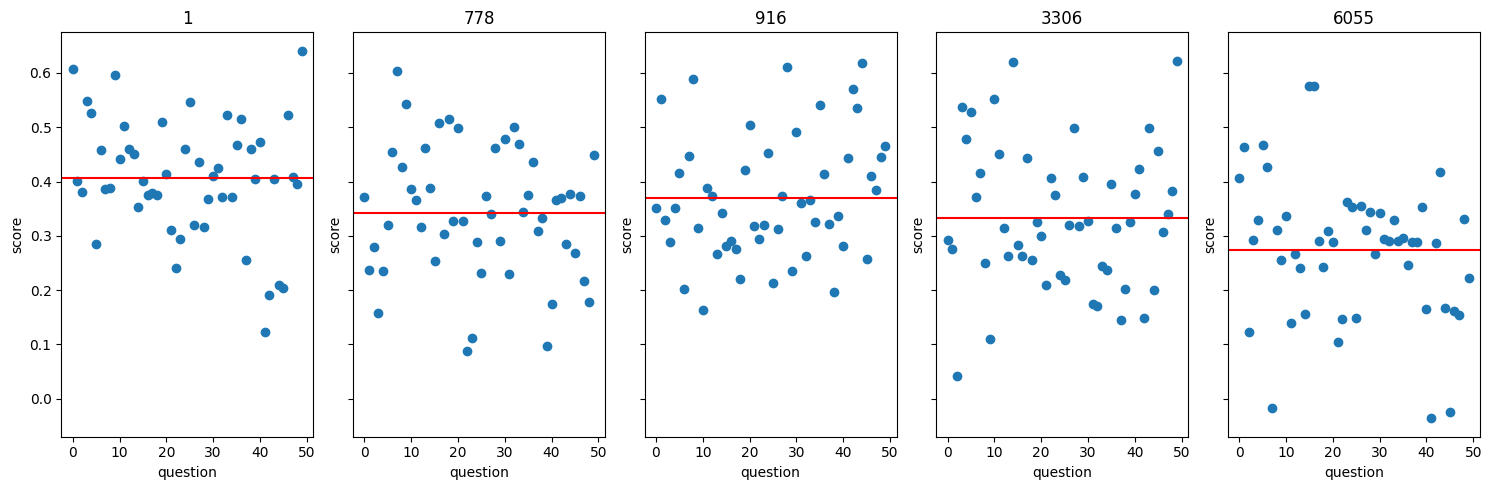

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15, 5))

# Loop through the axes and plot the data
for i, (ax, result) in enumerate(zip(axes, all_result)):
    ax.scatter(result.index, result['ver2'])
    ax.axhline(y=result['ver2'].mean(), color='r', linestyle='-', label='Average')
    ax.set_title(f'{codes[i]}')
    ax.set_xlabel('question')
    ax.set_ylabel('score')
    ax.set_ylim(bottom=0)

# Adjust layout
plt.tight_layout()
plt.show()

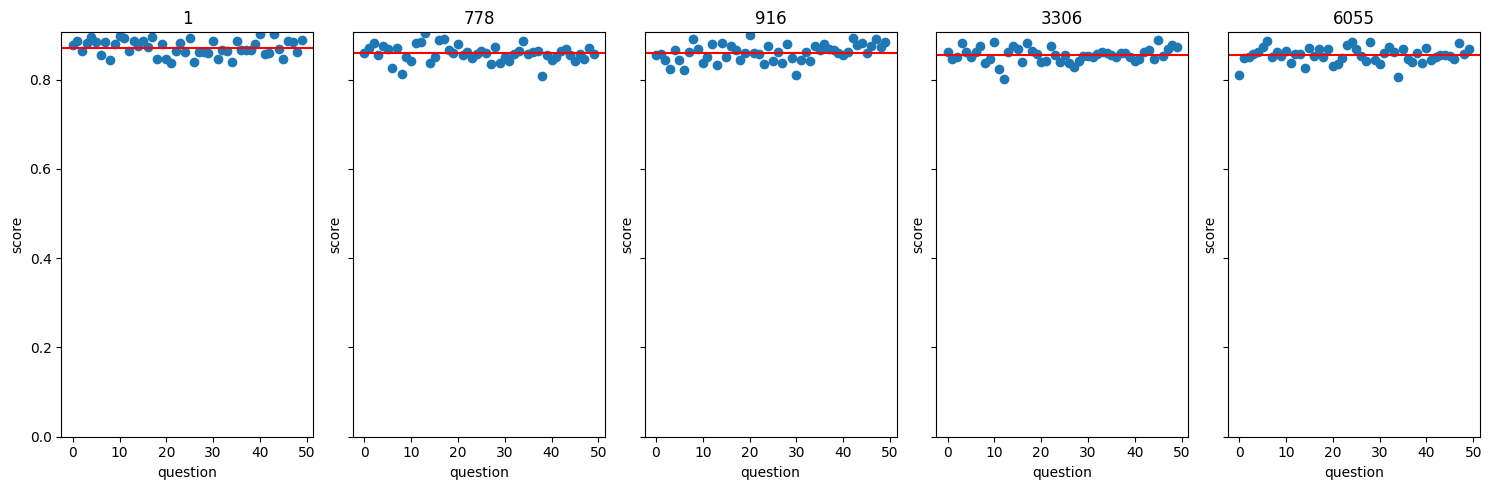

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15, 5))

for i, (ax, result) in enumerate(zip(axes, all_result)):
    ax.scatter(result.index, result[version])
    ax.axhline(y=result[version].mean(), color='r', linestyle='-', label='Average')
    ax.set_title(f'{codes[i]}')
    ax.set_xlabel('question')
    ax.set_ylabel('score')
    ax.set_ylim(bottom=0)  # Set the lower limit of the Y-axis to 1

plt.tight_layout()
plt.show()


In [5]:
codes = ['1', '778', '916', '3306', '6055']

all_result_ai = []

for code in codes:
    question = pd.read_excel('questions.xlsx', sheet_name=code).iloc[:, -1].dropna()
    expected_value = pd.read_excel('expected_value.xlsx', sheet_name=code).iloc[:, -1].dropna()
    response = pd.read_excel('response.xlsx', sheet_name=code).iloc[:, -1].dropna()
    result = []
    for i, j, k in tqdm(zip(question, expected_value, response)):
        keyword_prompt = validate_response_prompt(i, j, k)
        score = generate_response(keyword_prompt, key)
        result.append(score)

        result_df = pd.DataFrame(result, columns=['ver2'])

    all_result_ai.append(result_df)

with pd.ExcelWriter('evaluation_response_by_ai.xlsx') as writer:
    all_result_ai[0].to_excel(writer, sheet_name='1', index=False)
    all_result_ai[1].to_excel(writer, sheet_name='778', index=False)
    all_result_ai[2].to_excel(writer, sheet_name='916', index=False)
    all_result_ai[3].to_excel(writer, sheet_name='3306', index=False)
    all_result_ai[4].to_excel(writer, sheet_name='6055', index=False)

50it [01:47,  2.14s/it]
50it [02:00,  2.41s/it]
50it [01:57,  2.34s/it]
50it [01:41,  2.03s/it]
50it [01:48,  2.18s/it]
